In [1]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')
sns.set(style='whitegrid')

In [2]:
df = pd.read_csv("Exoplanet_Dataset.csv")

In [3]:
df.head()

,name,planet_status,mass,mass_error_min,mass_error_max,mass_sini,mass_sini_error_min,mass_sini_error_max,radius,radius_error_min,...,star_sp_type,star_age,star_age_error_min,star_age_error_max,star_teff,star_teff_error_min,star_teff_error_max,star_detected_disc,star_magnetic_field,star_alternate_names
0,109 Psc b,Confirmed,5.743,0.289,1.011,6.3830,0.078,0.078,1.152,NaN,...,G5 IV,6.90,0.60,0.60,5600.0,80.000,80.000,NaN,NaN,HD 10697
1,112 Psc b,Confirmed,NaN,0.005,0.004,0.0330,0.005,0.004,NaN,NaN,...,G0IV,NaN,NaN,NaN,5986.0,105.437,105.437,NaN,NaN,HD 12235
2,112 Psc c,Confirmed,9.866,1.781,3.190,NaN,NaN,NaN,NaN,NaN,...,G0IV,NaN,NaN,NaN,5986.0,105.437,105.437,NaN,NaN,HD 12235
3,11 UMi b,Confirmed,NaN,1.100,1.100,11.0873,1.100,1.100,NaN,NaN,...,K4III,1.56,0.54,0.54,4340.0,70.000,70.000,NaN,NaN,NaN
4,14 And Ab,Confirmed,NaN,0.230,0.230,4.6840,0.230,0.230,NaN,NaN,...,K0III,NaN,NaN,NaN,4813.0,20.000,20.000,NaN,NaN,NaN


In [4]:
df.tail()

,name,planet_status,mass,mass_error_min,mass_error_max,mass_sini,mass_sini_error_min,mass_sini_error_max,radius,radius_error_min,...,star_sp_type,star_age,star_age_error_min,star_age_error_max,star_teff,star_teff_error_min,star_teff_error_max,star_detected_disc,star_magnetic_field,star_alternate_names
5981,YBP 401 b,Confirmed,NaN,0.05000,0.05000,0.46000,0.05000,0.05000,NaN,NaN,...,F9/G0V,4.0,NaN,NaN,6165.0,64.0,64.0,NaN,NaN,"Cl* NGC 2682 YBP 401, NGC 2682 122"
5982,YSES 2 b,Confirmed,6.3,0.90000,1.60000,NaN,NaN,NaN,NaN,NaN,...,K1V,13.9,2.3,2.3,4749.0,40.0,40.0,NaN,NaN,"TYC 8984-2245-1, 2MASS J11275535-6626046"
5983,YZ Cet b,Confirmed,NaN,0.00028,0.00028,0.00220,0.00028,0.00028,NaN,NaN,...,M4.5,4.0,0.6,0.6,3056.0,60.0,60.0,NaN,NaN,NaN
5984,YZ Cet c,Confirmed,NaN,0.00035,0.00035,0.00359,0.00035,0.00035,NaN,NaN,...,M4.5,4.0,0.6,0.6,3056.0,60.0,60.0,NaN,NaN,NaN
5985,YZ Cet d,Confirmed,NaN,0.00038,0.00038,0.00343,0.00038,0.00038,NaN,NaN,...,M4.5,4.0,0.6,0.6,3056.0,60.0,60.0,NaN,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5986 entries, 0 to 5985
Data columns (total 98 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   name                        5986 non-null   object 
 1   planet_status               5986 non-null   object 
 2   mass                        2079 non-null   float64
 3   mass_error_min              2817 non-null   float64
 4   mass_error_max              2817 non-null   float64
 5   mass_sini                   1202 non-null   float64
 6   mass_sini_error_min         1039 non-null   float64
 7   mass_sini_error_max         1039 non-null   float64
 8   radius                      4568 non-null   float64
 9   radius_error_min            4093 non-null   float64
 10  radius_error_max            4093 non-null   float64
 11  orbital_period              5691 non-null   float64
 12  orbital_period_error_min    5091 non-null   float64
 13  orbital_period_error_max    5091 

In [6]:
cols = [
    'mass', 'radius', 'orbital_period', 'semi_major_axis', 'eccentricity', 'inclination',
    'discovered', 'mag_v', 'mag_j', 'mag_h', 'star_distance', 'star_metallicity', 'star_mass',
    'star_radius', 'star_age', 'star_teff', 'detection_type'
]
df = df[cols]
df['discovered'] = pd.to_numeric(df['discovered'], errors='coerce')

In [7]:
df = df.dropna(subset=['radius', 'mass', 'orbital_period', 'semi_major_axis', 'discovered', 'star_mass'])

In [8]:
for col in df.select_dtypes(include=['float64', 'int64']):
    df[col] = df[col].fillna(df[col].median())

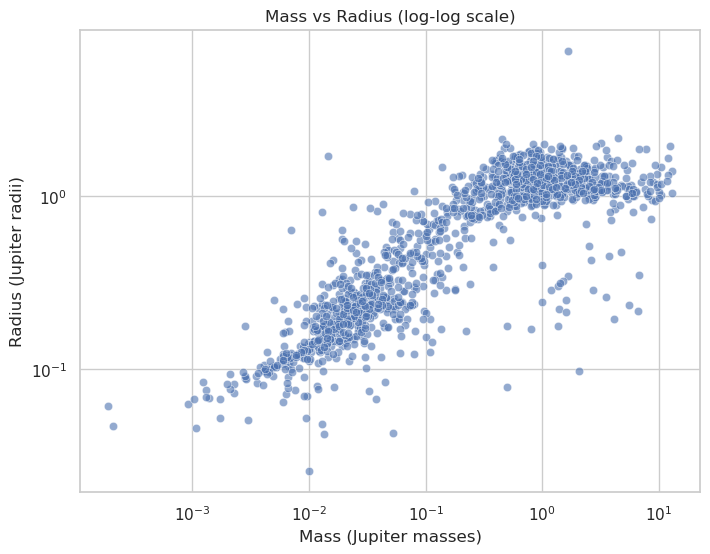

In [9]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='mass', y='radius', alpha=0.6)
plt.xscale('log')
plt.yscale('log')
plt.title("Mass vs Radius (log-log scale)")
plt.xlabel("Mass (Jupiter masses)")
plt.ylabel("Radius (Jupiter radii)")
plt.show()

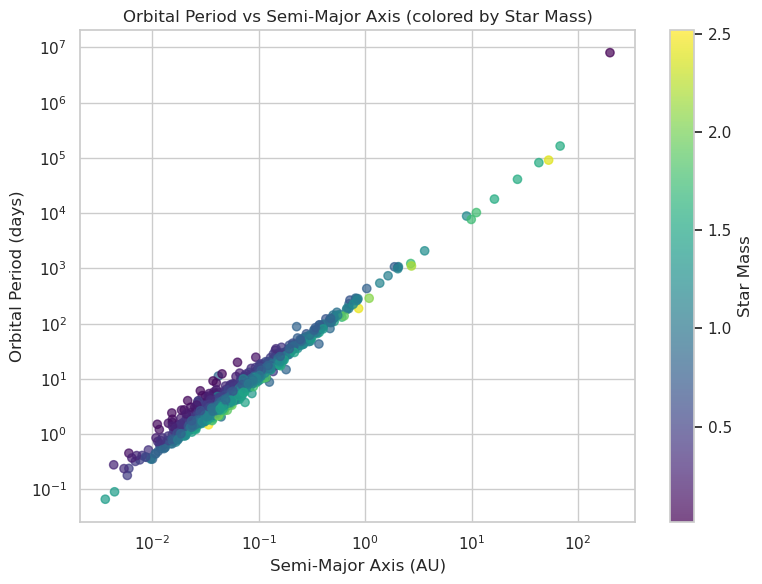

In [10]:
plt.figure(figsize=(8, 6))

# colrors
sc = plt.scatter(
    df['semi_major_axis'],
    df['orbital_period'],
    c=df['star_mass'],
    cmap='viridis',
    alpha=0.7
)

plt.xscale('log')
plt.yscale('log')
plt.xlabel("Semi-Major Axis (AU)")
plt.ylabel("Orbital Period (days)")
plt.title("Orbital Period vs Semi-Major Axis (colored by Star Mass)")
plt.colorbar(sc, label='Star Mass')
plt.tight_layout()
plt.show()

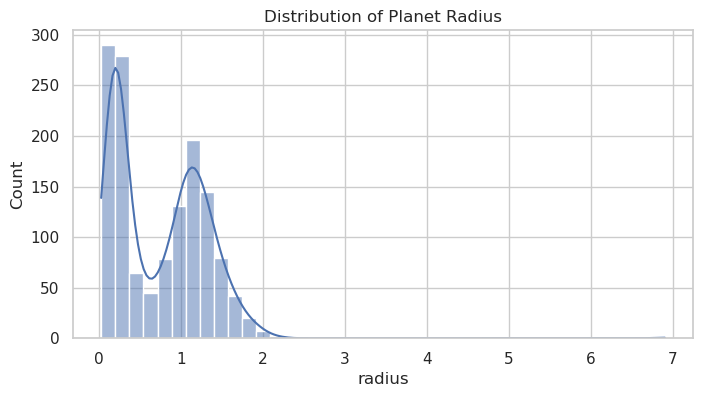

In [11]:
plt.figure(figsize=(8, 4))
sns.histplot(df['radius'], bins=40, kde=True)
plt.title("Distribution of Planet Radius")
plt.show()

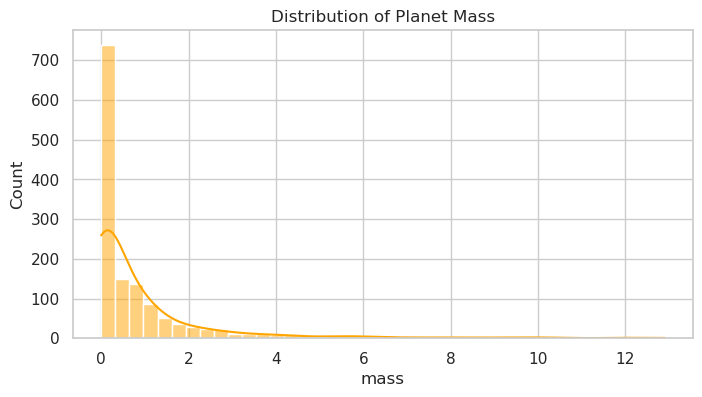

In [12]:
plt.figure(figsize=(8, 4))
sns.histplot(df['mass'], bins=40, kde=True, color='orange')
plt.title("Distribution of Planet Mass")
plt.show()

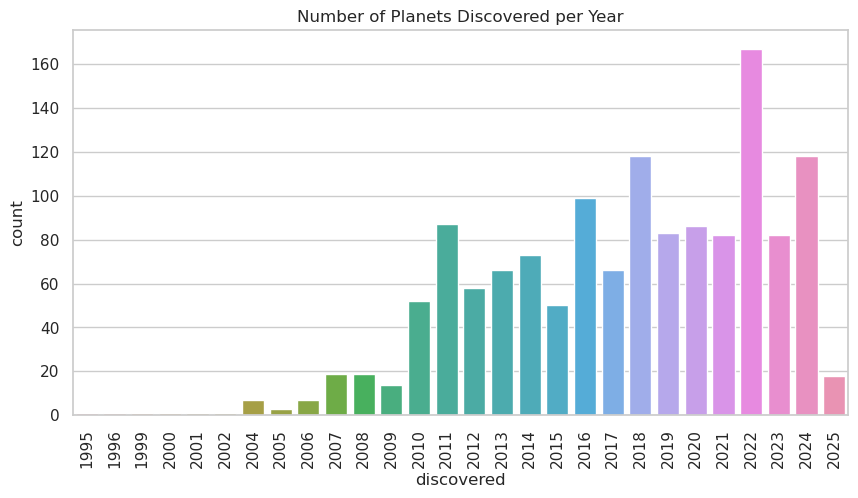

In [13]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='discovered')
plt.xticks(rotation=90)
plt.title("Number of Planets Discovered per Year")
plt.show()

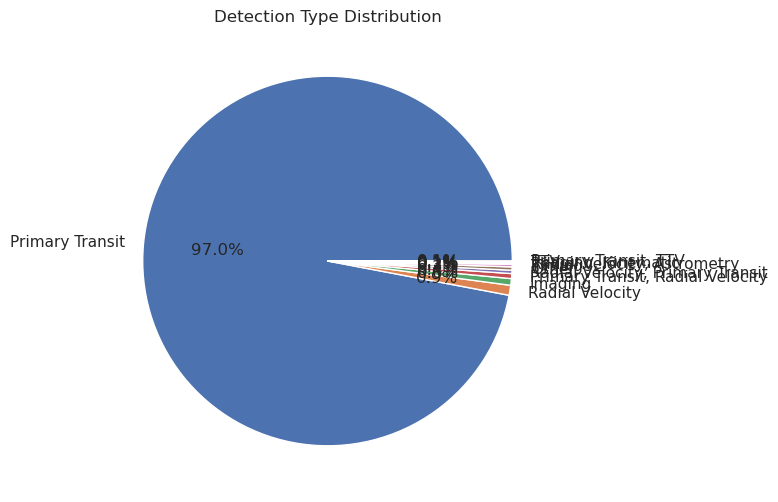

In [14]:
plt.figure(figsize=(6, 6))
df['detection_type'] = df['detection_type'].fillna('Unknown')
df['detection_type'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title("Detection Type Distribution")
plt.ylabel("")
plt.show()

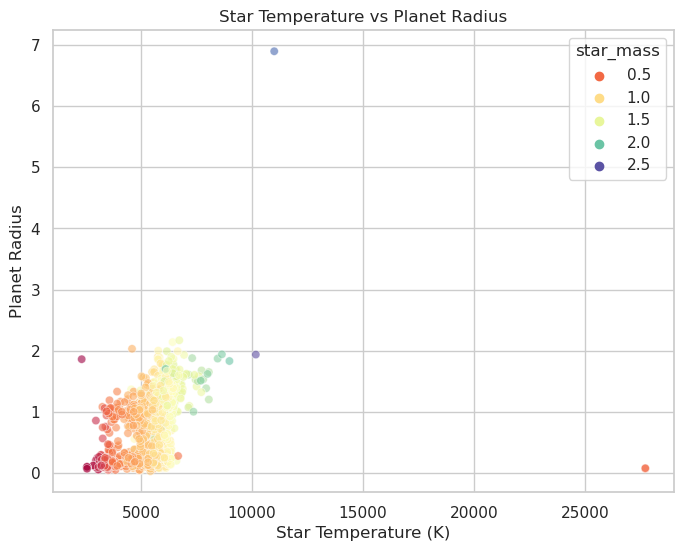

In [15]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='star_teff', y='radius', hue='star_mass', alpha=0.6, palette='Spectral')
plt.title("Star Temperature vs Planet Radius")
plt.xlabel("Star Temperature (K)")
plt.ylabel("Planet Radius")
plt.show()

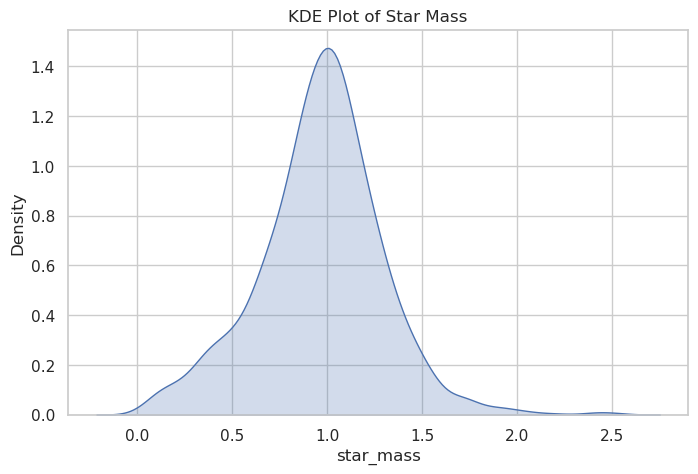

In [16]:
plt.figure(figsize=(8, 5))
sns.kdeplot(df['star_mass'], fill=True)
plt.title("KDE Plot of Star Mass")
plt.show()

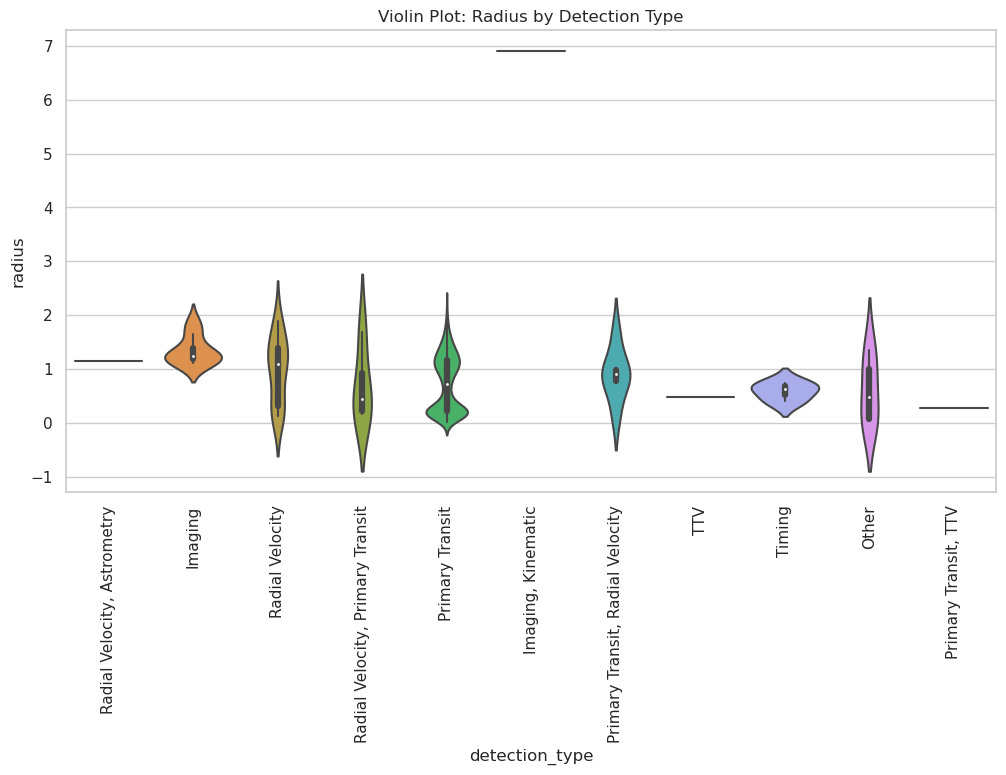

In [17]:
plt.figure(figsize=(12, 6))
sns.violinplot(data=df, x='detection_type', y='radius')
plt.xticks(rotation=90)
plt.title("Violin Plot: Radius by Detection Type")
plt.show()

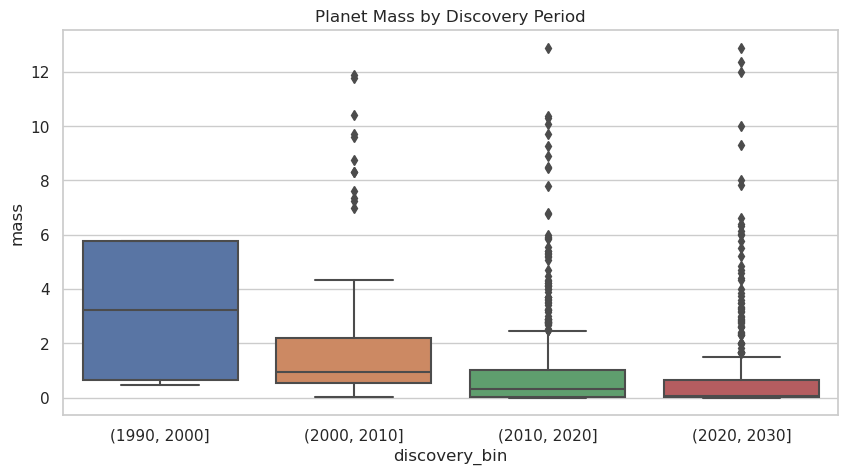

In [18]:
df['discovery_bin'] = pd.cut(df['discovered'], bins=[1990, 2000, 2010, 2020, 2030])
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x='discovery_bin', y='mass')
plt.title("Planet Mass by Discovery Period")
plt.show()

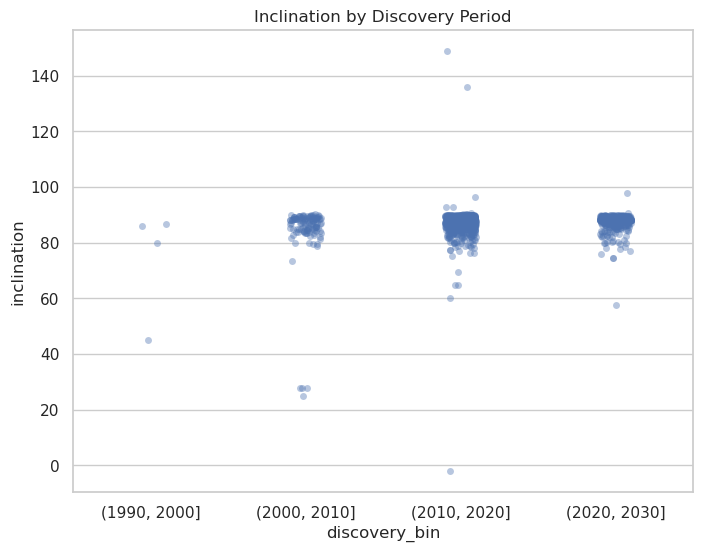

In [19]:
plt.figure(figsize=(8, 6))
sns.stripplot(data=df, x='discovery_bin', y='inclination', jitter=True, alpha=0.4)
plt.title("Inclination by Discovery Period")
plt.show()

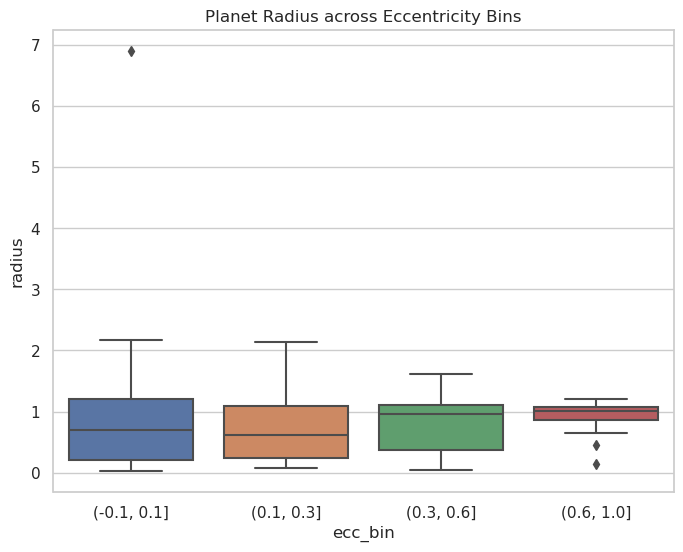

In [20]:
df['ecc_bin'] = pd.cut(df['eccentricity'], bins=[-0.1, 0.1, 0.3, 0.6, 1.0])
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='ecc_bin', y='radius')
plt.title("Planet Radius across Eccentricity Bins")
plt.show()

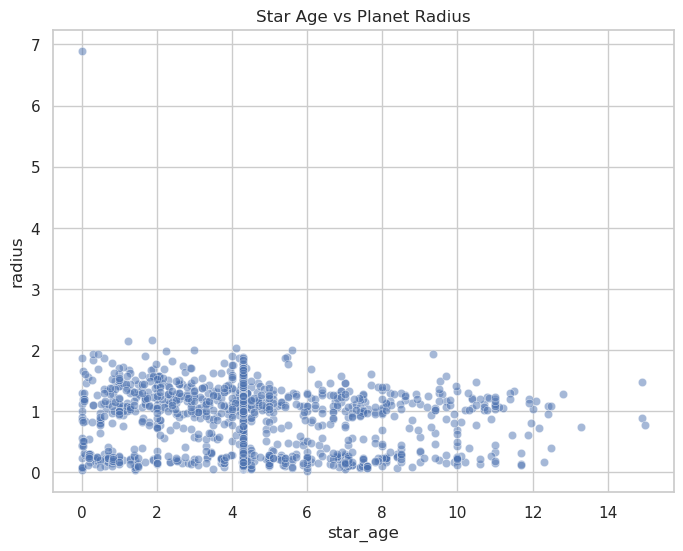

In [21]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='star_age', y='radius', alpha=0.5)
plt.title("Star Age vs Planet Radius")
plt.show()

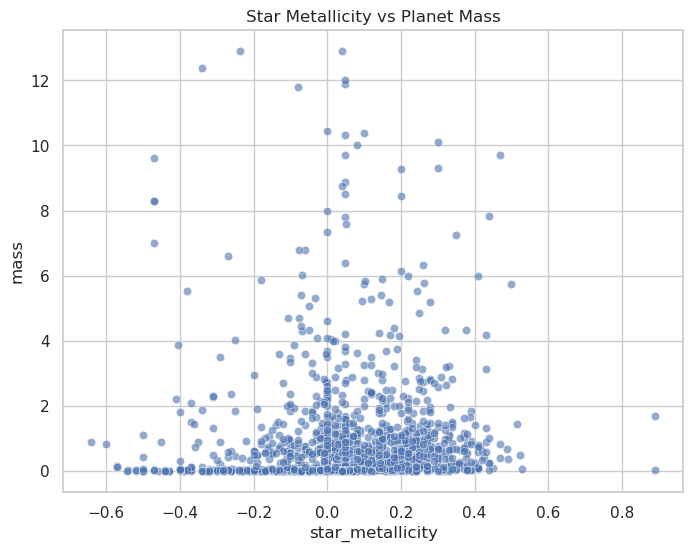

In [22]:


plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='star_metallicity', y='mass', alpha=0.6)
plt.title("Star Metallicity vs Planet Mass")
plt.show()



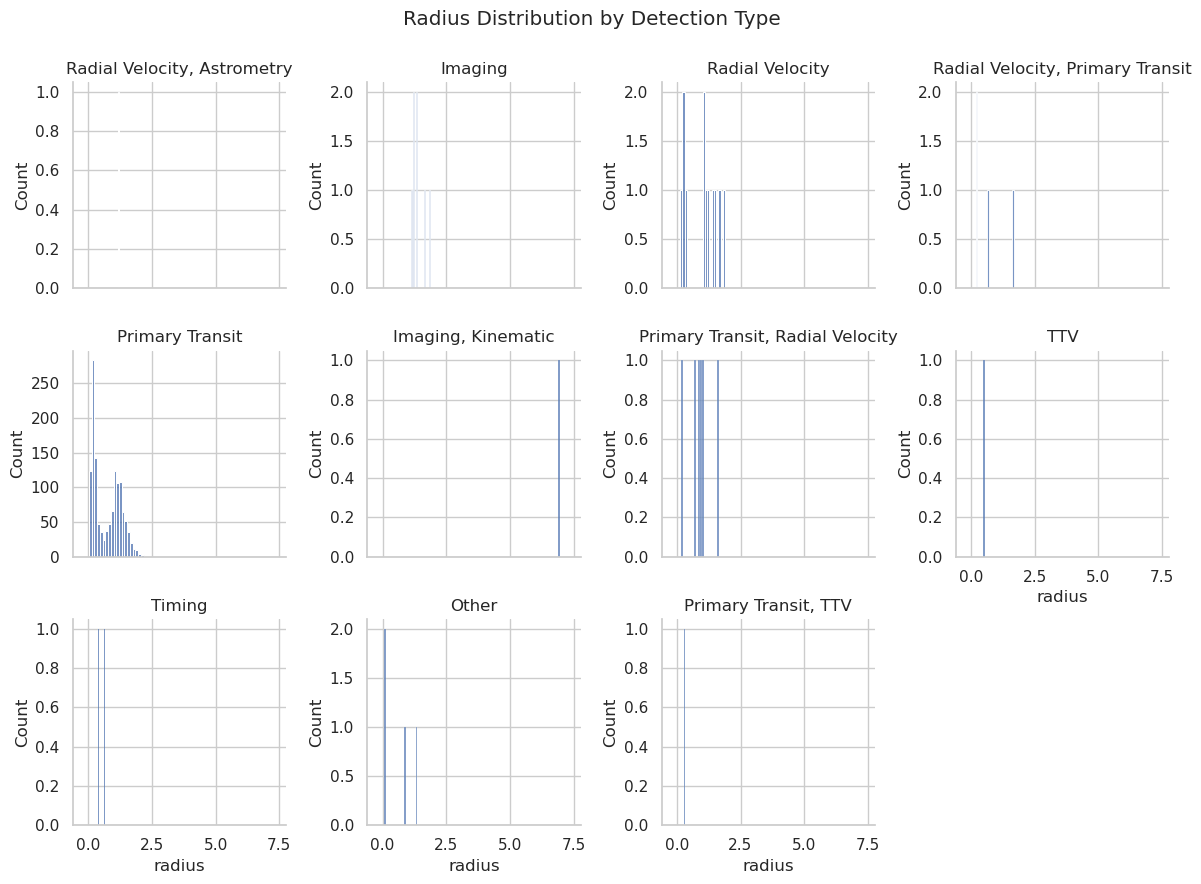

In [23]:
g = sns.FacetGrid(df, col='detection_type', col_wrap=4, height=3, sharey=False)
g.map_dataframe(sns.histplot, x='radius', bins=20)
g.set_titles("{col_name}")
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle("Radius Distribution by Detection Type")
plt.show()